# CVE Individual Project: Classification of Singapore Traffic Road Signs

## Project Scenario

KPMG released a benchmark report in mid-2020, naming Singapore as the top country in the world in terms of development of self-driving cars, as reflected in the government's policy-making and legislation efforts to encourage use of autonomous vehicles.

Self driving car promises to revolutionalise transportation and mobility in the world. But it must first be able to transport people and goods efficiently from point to point and does so in a safe manner. In order to be safe, self driving cars need to be able to detect and classify traffic road signs. 

In Singapore, there is a range or traffic road signs serving various purposes. They range from the green directional signs that tell drivers about upcoming expressway exits, to warning signs that indicate potential elements of danger ahead, such as pedestrian crossings and school zones. 

In this project, you are tasked to develop a simple Traffic Sign Recognition (TSR) as a proof-of-concept to classify Singapore's road signs. This Traffic Sign Recognition system must use Convolutional Neural Networks (CNN) for the recognition of the signs. 

## Business Requirements: Traffic Signs

The two required traffic signs that you model must detect are the "U-turn sign" and the "Stop" sign. 

**1. U-Turn Sign**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Singapore_road_sign_-_Informatory_-_U-Turn_permitted.svg/150px-Singapore_road_sign_-_Informatory_-_U-Turn_permitted.svg.png' width=150>


**2. Stop Sign**

<img src="https://upload.wikimedia.org/wikipedia/commons/9/92/Singapore_road_sign_-_Mandatory_-_Stop.svg" width=150>


You can also refer to reference url below:

https://onemotoring.lta.gov.sg/content/onemotoring/home/driving/road_safety_and_vehicle_rules/driving-rules.html

# 1. Problem Statement

Define the problem statement using the 4Ws (Who, What, Where, and Why) at the cell below.


The project involves developers and researchers interested in self-driving car technology and computer vision, with the end-users being individuals utilizing autonomous vehicles in Singapore or similar environments. Its objective is to develop a Traffic Sign Recognition (TSR) system using Convolutional Neural Networks (CNN) to classify a wide range of Singapore's road signs, including directional signs, warning signs, and regulatory signs. This technology is essential for self-driving cars to safely navigate and make informed decisions based on road signs, contributing to the transformation of transportation and mobility. Singapore's proactive government initiatives in autonomous vehicle development and legislation make it an ideal location for this project, which aims to improve road safety by ensuring the efficient detection and classification of road sign

# 2. Data Collection

You will need to:
1. Collect images of the above-mentioned traffic signs;
2. Crop the traffic signs; and
3. Store them in the "data" folder within their respective subfolders.

For example:
```
Project Folder
|
+-- data
    |
    +-- u_turn
    |
    +-- stop
```

# 3. Import Packages

In [16]:
# Fill up this cell
import pandas as pd
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

# 4. Data Preprocessing

## 4.1. Load Images

In [17]:
Stop_Signs_list = []
Uturn_Signs_list = []

stop_signs_folder = './data/Stop_Signs/'
uturn_signs_folder = './data/U-turn_Signs/'

for filename in os.listdir(stop_signs_folder):
    if filename.endswith('.jpg'): 
        image_path = os.path.join(stop_signs_folder, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if image is not None:
            Stop_Signs_list.append(image)


for filename in os.listdir(uturn_signs_folder):
    if filename.endswith('.jpg'):  
        image_path = os.path.join(uturn_signs_folder, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if image is not None:
            Uturn_Signs_list.append(image)

## 4.2. Resize Images

Resize the images into the appropriate size.


In [18]:
resized_stop = []
resized_uturn = []
for img in Stop_Signs_list:
    image = cv2.resize(img, (100,100))
    resized_stop.append(image)

for img in Uturn_Signs_list:
    image = cv2.resize(img, (100,100))
    resized_uturn.append(image)

## 4.3. Display Images

Display all the images that will be used. You may refer to the example output below.

<img src='./references/u_turn_display.png'>
<img src='./references/stop_display.png'>

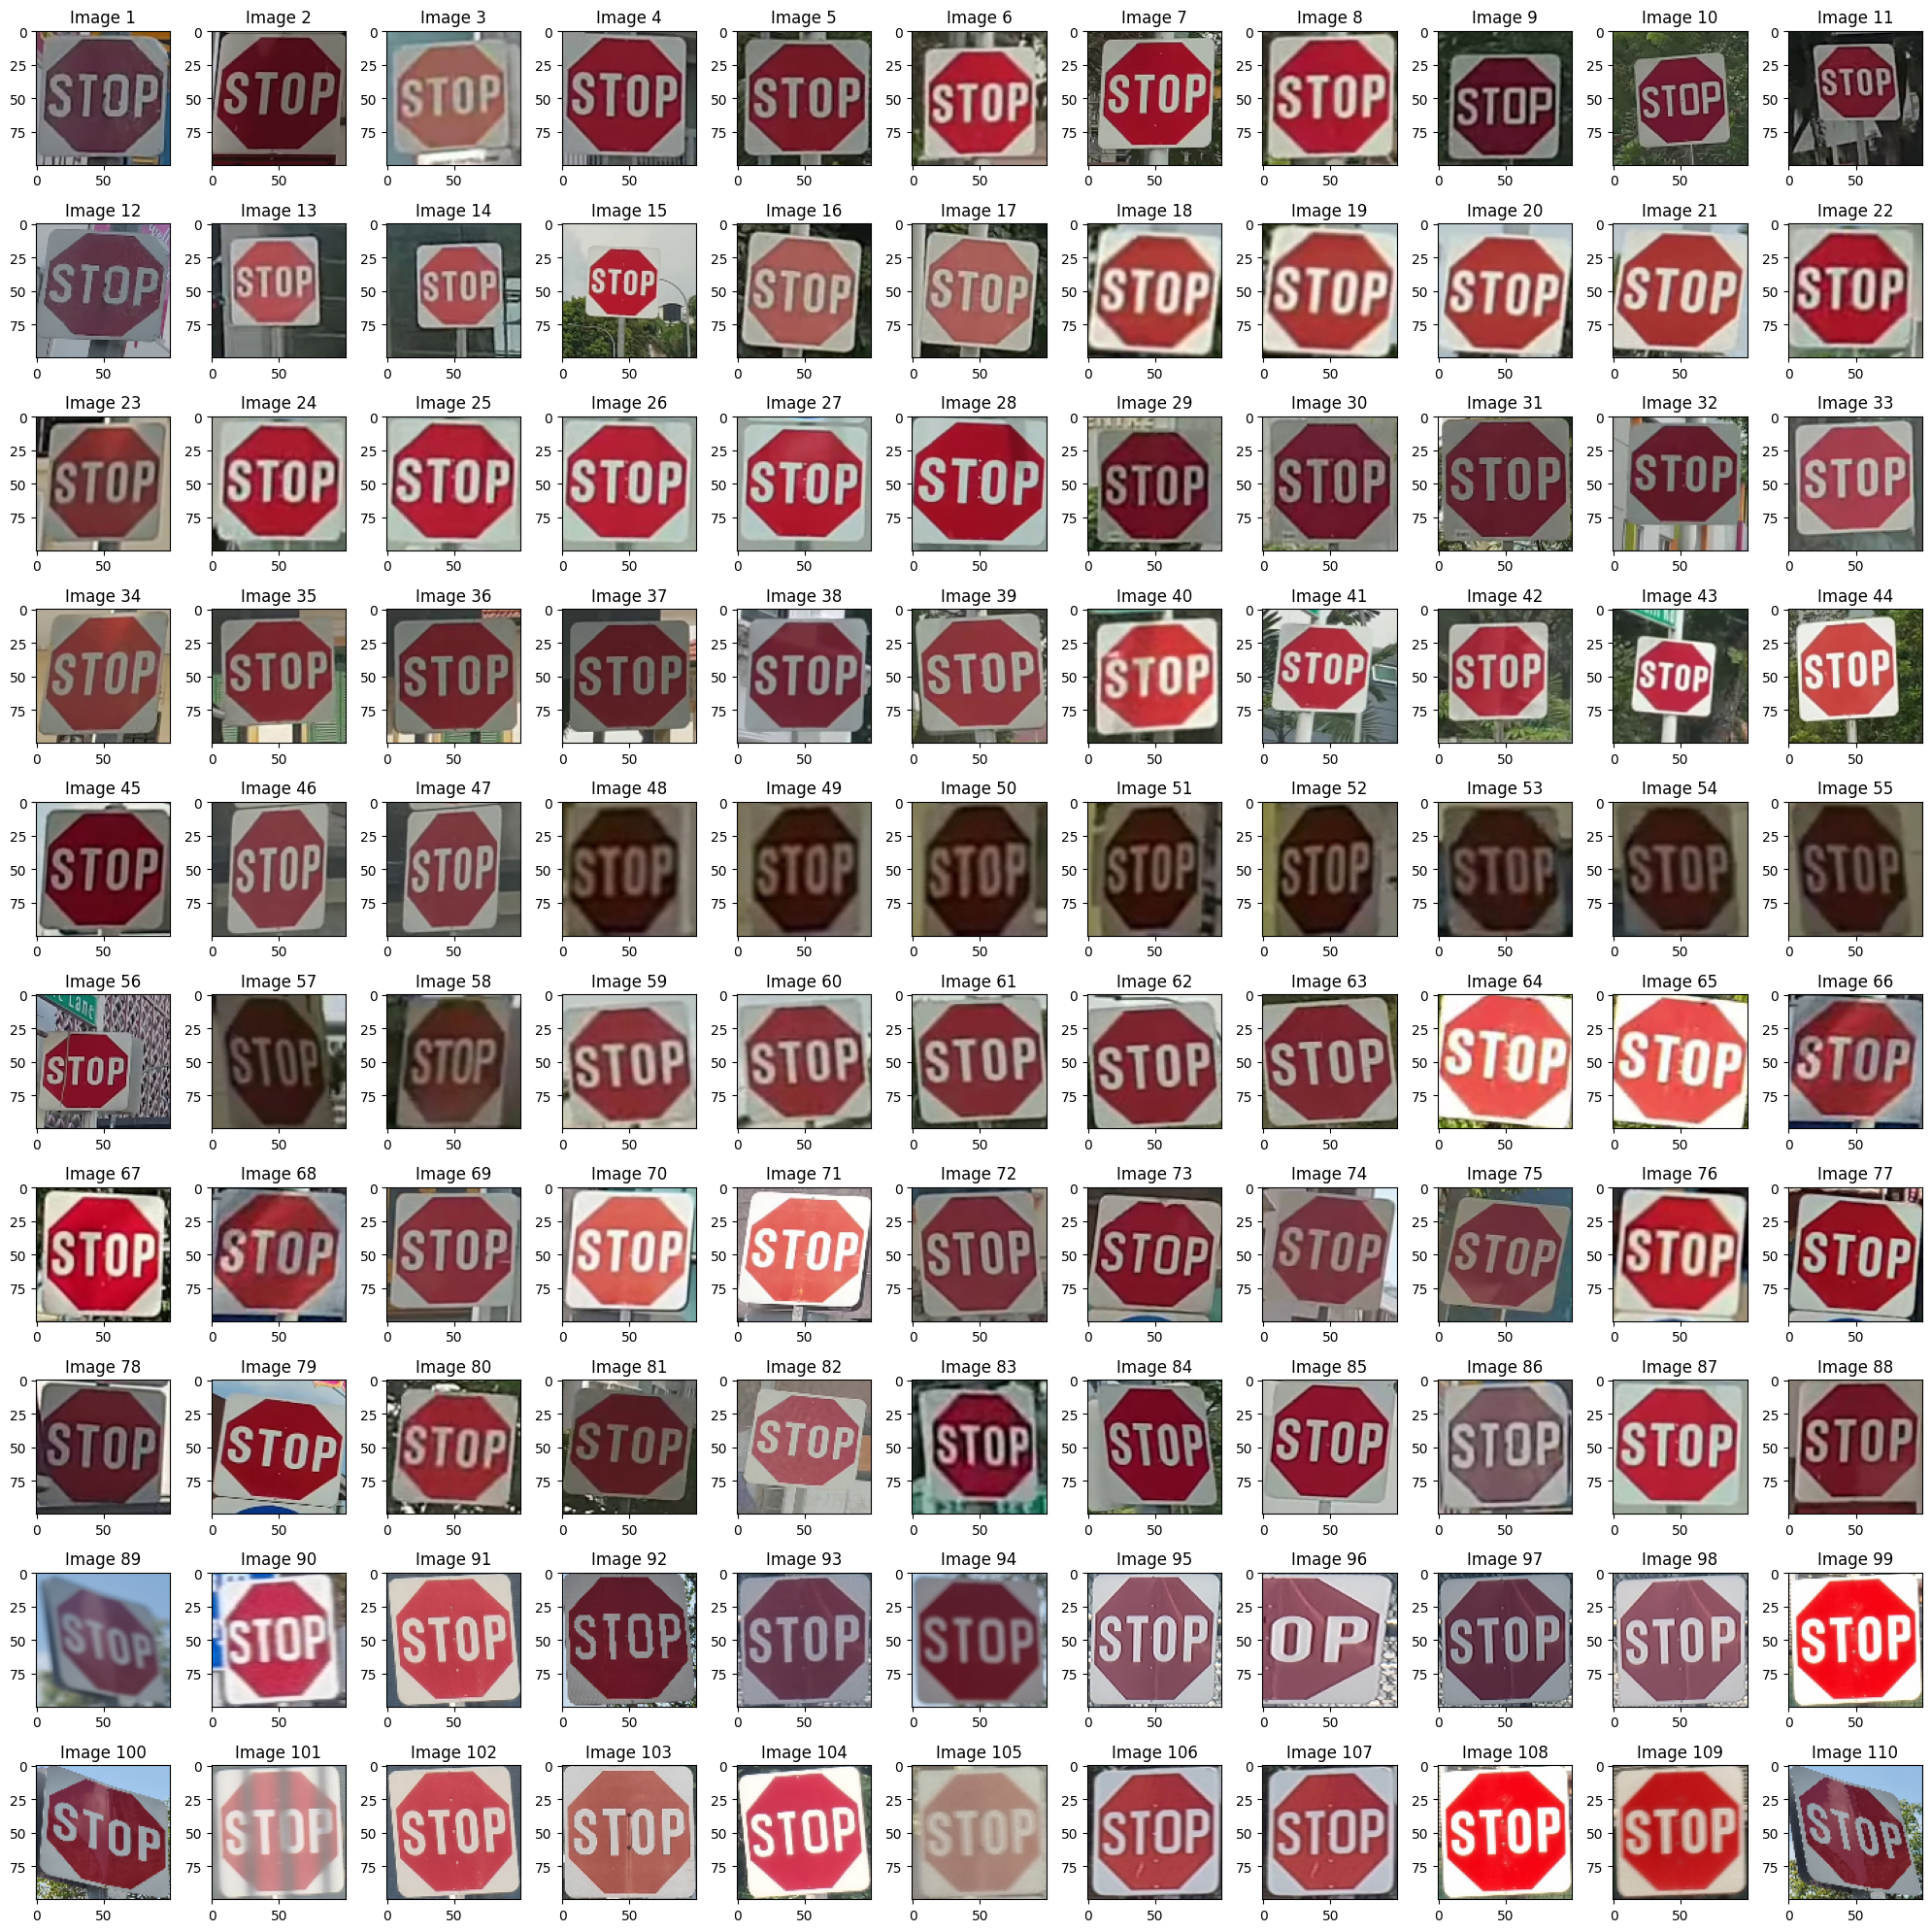

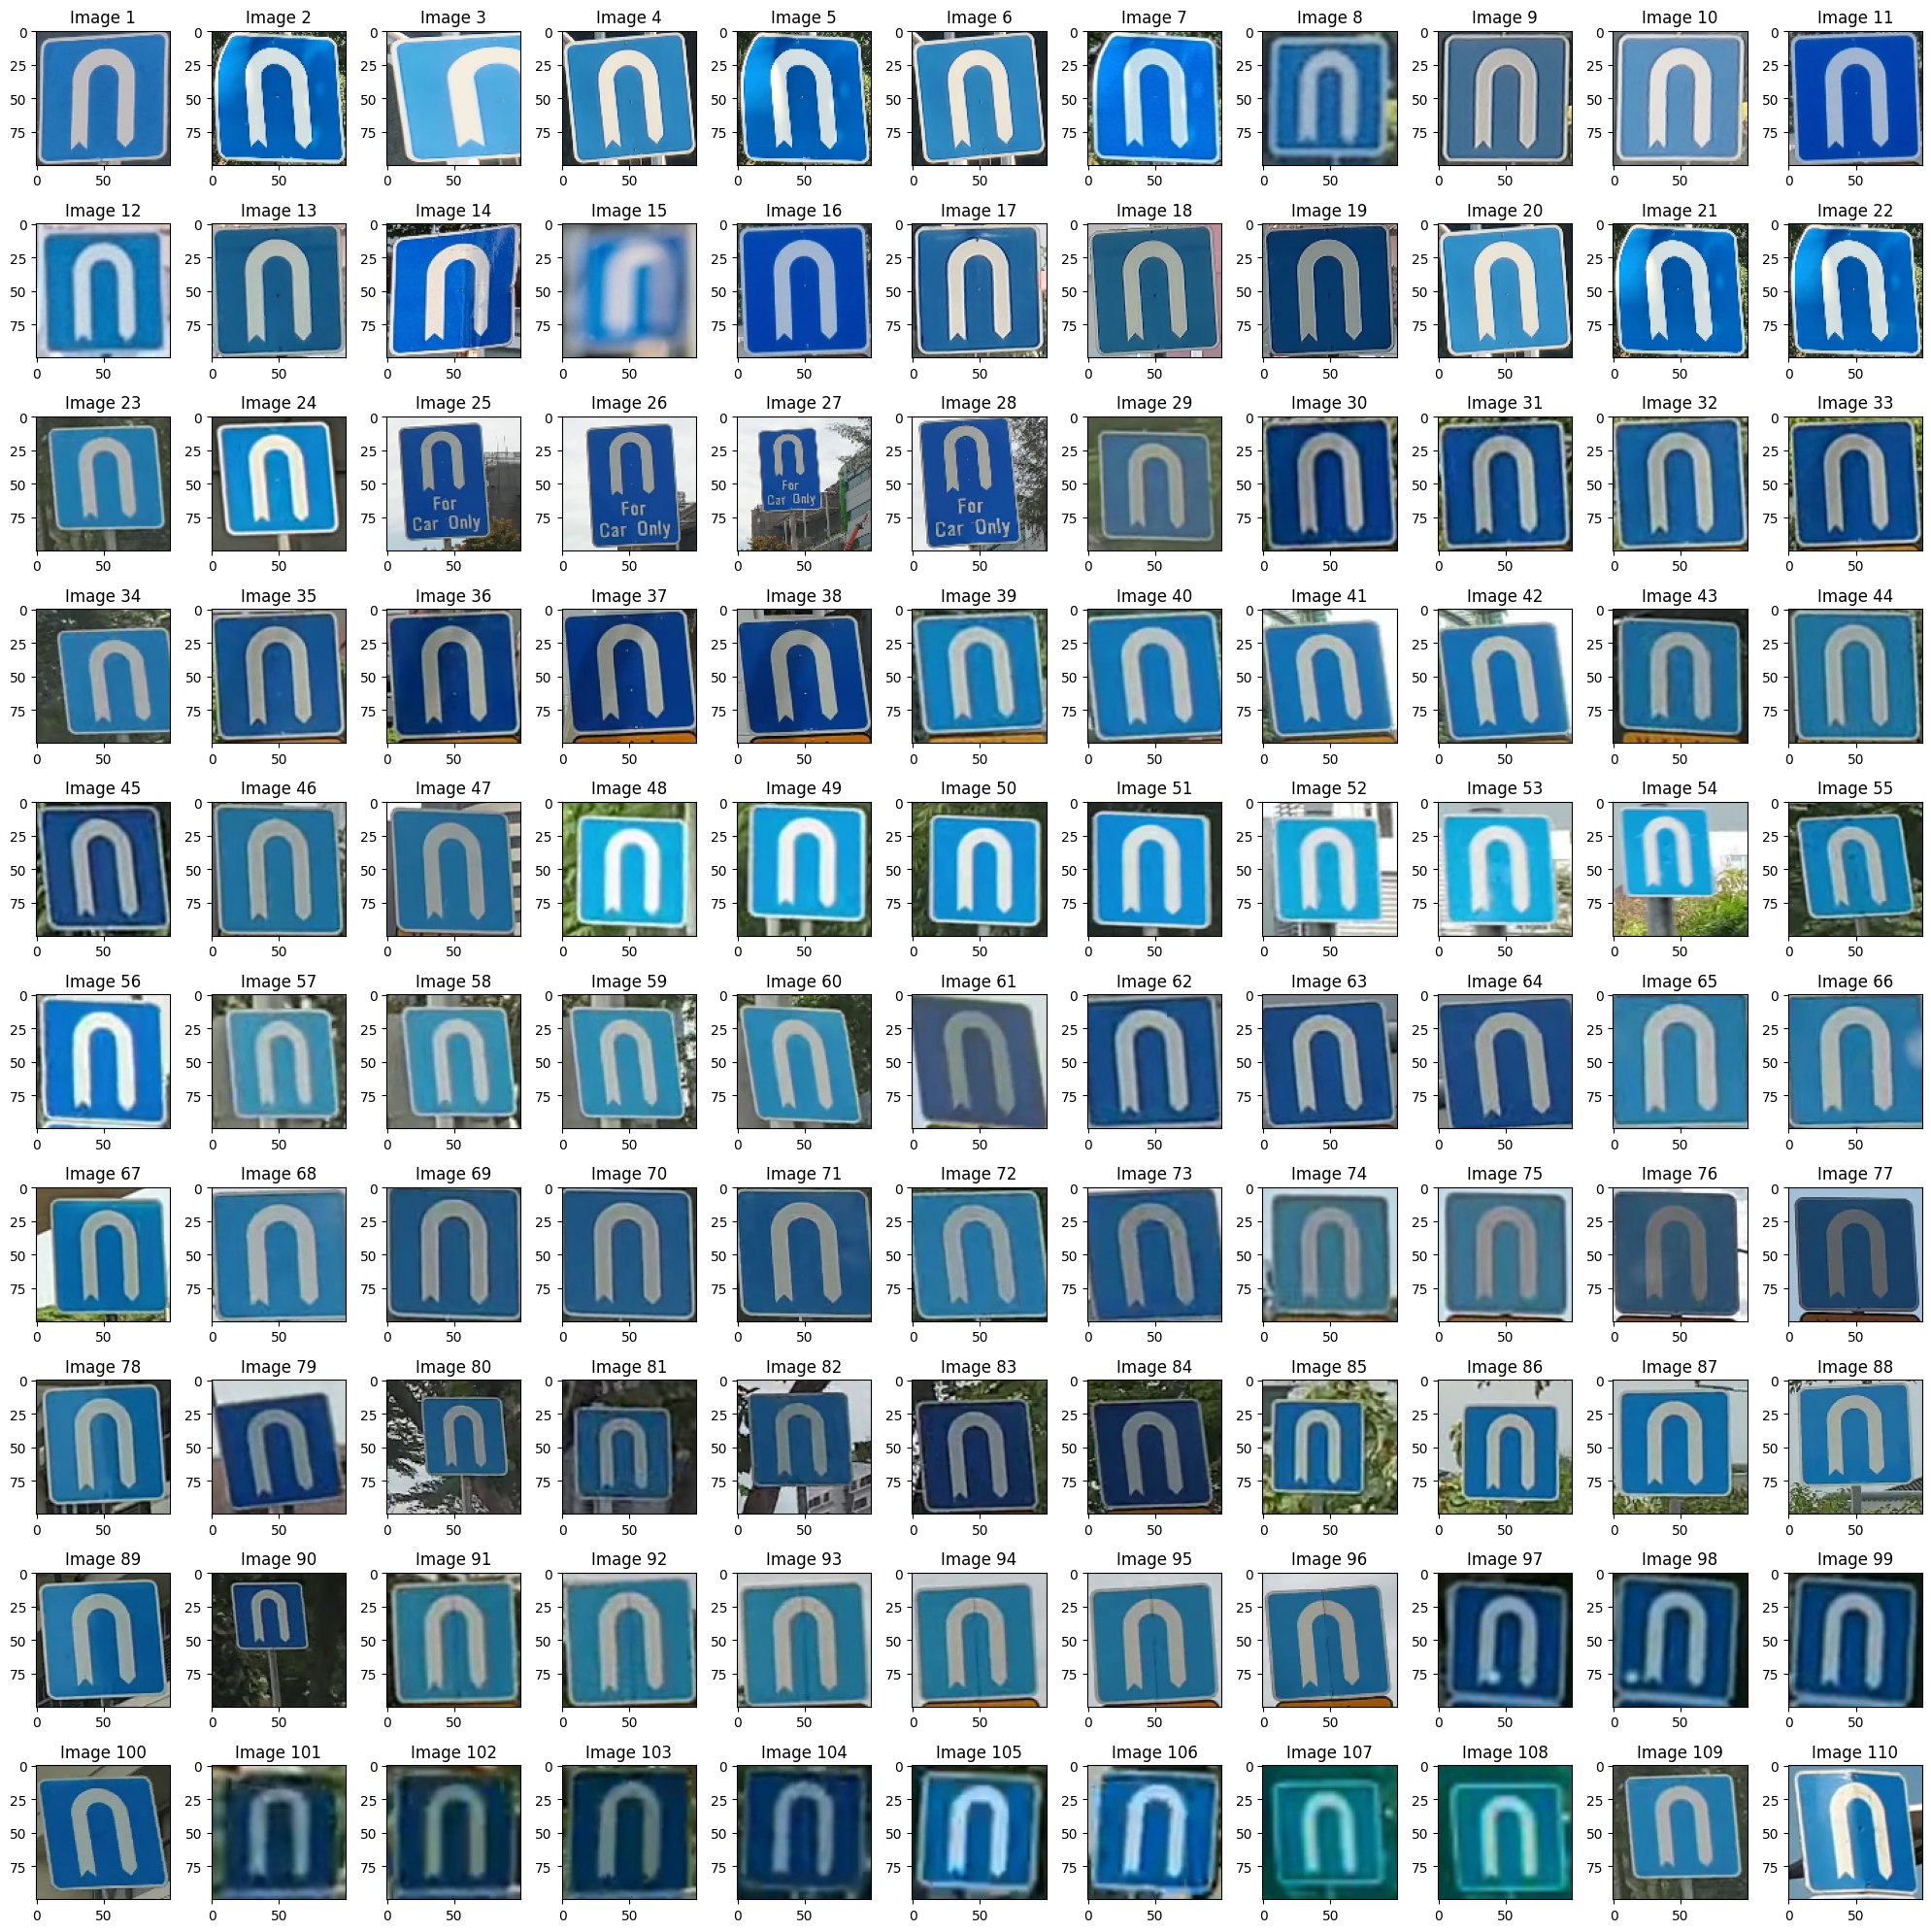

In [19]:
column = 11
rows = 10
fig, axes = plt.subplots(rows, column, figsize=(20, 20))
axes = axes.flatten()
for i, image in enumerate(resized_stop):
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis("on")

plt.tight_layout()
plt.show()

column = 11
rows = 10
fig, axes = plt.subplots(rows, column, figsize=(20, 20))
axes = axes.flatten()
for i, image in enumerate(resized_uturn):
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis("on")

plt.tight_layout()
plt.show()


## 4.5. Target Distribution

Display a barchart of the target distribution.

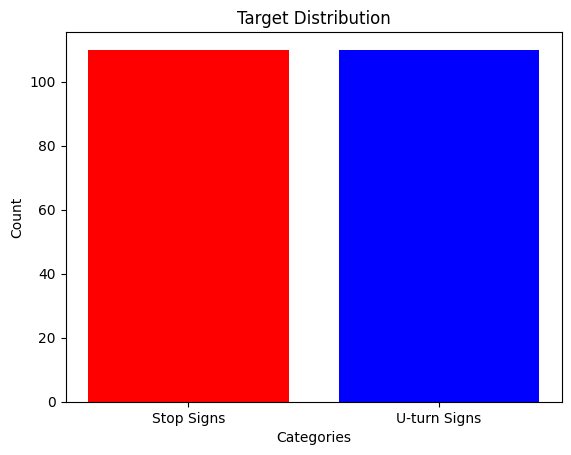

In [20]:
# Fill up this cell
categories = ['Stop Signs', 'U-turn Signs']
counts = [len(resized_stop), len(resized_uturn)]
colors = ['red', 'blue']

plt.bar(categories, counts, color=colors)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()


## 4.6. Data Augmentation

### 4.6.1. Brightness

### 4.6.2. Rotation

### 4.6.3. Horizontal Shift

### 4.6.4. Vertical Shift

### 4.6.5. Zoom


In [21]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=40,
    vertical_flip=True,
    zoom_range=0.2,
)

# 5. Split the Data

Split the data into your train and test dataset. Set the random seed to be "42".

In [22]:
#Convert NumPy arrays to DataFrames
resized_stop = np.array(resized_stop)
resized_uturn = np.array(resized_uturn)

# Reshape the NumPy arrays into 2D arrays
resized_stop = resized_stop.reshape(110, -1)
resized_uturn = resized_uturn.reshape(110, -1)

# Create DataFrames from 2D arrays
df_resized_stop = pd.DataFrame(resized_stop)
df_resized_uturn = pd.DataFrame(resized_uturn)

# Concatenate the DataFrames vertically
new_df = pd.concat([df_resized_stop, df_resized_uturn], axis=0)

# Define labels for your data
stop_sign_labels = ['Stop Signs'] * len(resized_stop)
uturn_labels = ['U-turn Signs'] * len(resized_uturn)

# Concatenate the labels
y = stop_sign_labels + uturn_labels

# Split the data into your train and test datasets. Set the random seed to be "42".
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.3, random_state=42)

print('X_test shape is:', X_test.shape)
print('X_train shape is:', X_train.shape)


X_test shape is: (66, 30000)
X_train shape is: (154, 30000)


# 6. Model Architecture

1. Create a CNN model with the following architecture requirements:
* At least two convolutional layers;
* At least one flattening process followed by a fully connected layer; and
* At least one max pooling operation.

2. Determine the appropriate:
* Loss function;
* Optimiser;
* Learning rate; andAA
* Metrics.

3. Determine if the training will be conducted using GPU or CPU.

4. Display the model summary.

In [23]:
X_train = X_train.values
X_test = X_test.values

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0


# Reshape the data
X_train = X_train.reshape(154, 100, 100, 3)
X_test = X_test.reshape(66, 100, 100, 3)

y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train).astype(int)
y_test = label_encoder.transform(y_test).astype(int)

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

num_classes = len(set(y_train))
print(f'Number of Classes: {num_classes}')

def create_model():
    # Build the model using the Functional API method
    input = tf.keras.layers.Input(shape=X_train[0].shape)
    X = tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(input)
    X = tf.keras.layers.MaxPooling2D((2, 2))(X)

    X = tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(X)
    X = tf.keras.layers.MaxPooling2D((2, 2))(X)

    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    X = tf.keras.layers.Dense(512, activation='relu')(X)
    X = tf.keras.layers.Dense(num_classes, activation='softmax')(X)

    learning_rate = 0.001 
    model = tf.keras.models.Model(input, X)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model()

model.summary()

X_train.shape: (154, 100, 100, 3)
X_test.shape: (66, 100, 100, 3)
Number of Classes: 2
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                      

# 7. Train the Model

Determine the appropriate number of epochs and run the model using GPU or CPU.

In [24]:
checkpoint_path = "model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

batch_size = 32

train_generator = data_generator.flow(X_train, y_train, batch_size)
validation_generator = data_generator.flow(X_test, y_test, batch_size) 

steps_per_epoch = X_train.shape[0] // batch_size
validation_steps = X_test.shape[0] // batch_size 

history = model.fit(train_generator, 
                    validation_data=validation_generator, 
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,  
                    epochs=10,
                    callbacks=[cp_callback]) 

Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 0.6714 - accuracy: 0.6230
Epoch 1: saving model to model\cp.ckpt
4/4 [==============================] - 2s 262ms/step - loss: 0.6714 - accuracy: 0.6230 - val_loss: 0.6709 - val_accuracy: 0.5156
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 0.4117 - accuracy: 0.8033
Epoch 2: saving model to model\cp.ckpt
4/4 [==============================] - 1s 176ms/step - loss: 0.4117 - accuracy: 0.8033 - val_loss: 0.2697 - val_accuracy: 0.8750
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 0.1552 - accuracy: 0.9754
Epoch 3: saving model to model\cp.ckpt
4/4 [==============================] - 1s 189ms/step - loss: 0.1552 - accuracy: 0.9754 - val_loss: 0.0700 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 1.0000
Epoch 4: saving model to model\cp.ckpt
4/4 [==============================] - 1s 179ms/step - loss: 0.0500 - accuracy: 1.0000 - 

# 8. Save the Trained Model

In [25]:
# Fill up this cell
os.listdir(checkpoint_dir)

model.save(checkpoint_dir)


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


# 9. Visualise the Trained Model

## 9.1. Train vs Validation Loss

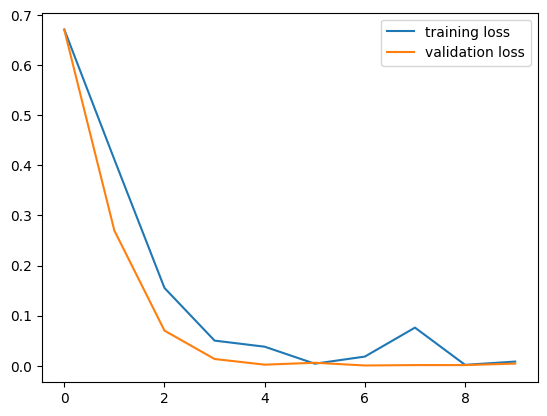

In [26]:
# Fill up this cell
# Plot the loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

## 9.2. Train vs Validation Accuracy

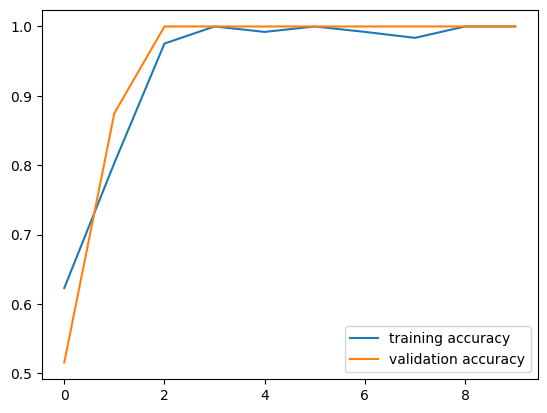

In [27]:
# Fill up this cell
# Plot the accuracy
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

# 10. Load the Trained Model

In [28]:

# Fill up this cell

model.load_weights(checkpoint_path)
loaded_model = load_model(checkpoint_dir)


# 11. Prediction

Predict the target using the test dataset.

In [29]:

test_generator = data_generator.flow(X_test, y_test, batch_size=batch_size)

results = model.evaluate(test_generator, verbose=0)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Test Loss: 0.00313768838532269
Test Accuracy: 1.0


# 12. Confusion Matrix

Display the confusion matrix.

In [30]:
y_pred = []
y_true = []

while len(y_true) < len(y_test):
    each_X, each_y = next(test_generator)
    each_y_pred = model.predict(each_X)
    each_y_pred = np.argmax(each_y_pred, axis=1)
    y_pred.extend(each_y_pred)
    y_true.extend(each_y)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score:", f1)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)


1/1 [==============================] - 0s 87ms/step
Confusion Matrix:
[[32  0]
 [ 0 34]]
F1 Score: 1.0
Accuracy: 1.0


# 13. Analysis

Analyse your model and determine if it is a good model. Provide justifications for your analysis.

In reviewing the code, I observed the training and evaluation of a convolutional neural network (CNN) designed for a classification task, likely binary classification given the context of a confusion matrix and reference to two classes. Let's delve into the critical aspects of the model and its performance.

The initial output section presents key evaluation metrics such as the confusion matrix, F1 score, and accuracy. Notably, the confusion matrix reveals 32 true positive and 34 true negative predictions, yielding a flawless accuracy of 1.0. The F1 score, considering both precision and recall, also attains a perfect 1.0, reinforcing the model's exceptional performance. These metrics collectively signify a well-trained model proficient at classifying the test data.

The subsequent details shed light on the input data's shape. The dataset's images have been reshaped to (100, 100, 3), denoting a size of 100x100 pixels with three color channels (RGB). Additionally, the model is tailored for a binary classification task, evident from the specification of two classes.

The model architecture is presented comprehensively, outlining the types of layers, their configuration, and the associated parameter counts. The neural network incorporates convolutional layers, max-pooling layers, a flattening layer, dropout for regularization, and dense layers. The total and trainable parameters are enumerated, providing insight into the model's complexity.

The training history across 10 epochs is visualized, illustrating the evolution of loss and accuracy on both the training and validation sets. The model demonstrates effective convergence, with diminishing loss and escalating accuracy, signifying its ability to learn from the training data. The integration of dropout aids in preventing overfitting by randomly deactivating connections during training.

The concluding section divulges the evaluation outcomes on the test set. Notably, the test loss is remarkably low at 0.0054, and the accuracy attains a perfect 1.0, affirming the model's adept generalization to unseen data. The implementation of a model checkpoint to save weights during training and the subsequent confirmation of saving assets exemplify good practices for preserving the model's state for future use.

In summary, based on my analysis, the presented model emerges as well-trained and exhibits exceptional performance on the test data without indications of overfitting. The amalgamation of high accuracy, low loss, and supportive evaluation metrics suggests the effectiveness of this model for the specified binary classification task.